# BANK CHURN ANALYSIS

# Import Library 

In [1]:
#pip install graphviz

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC  

In [3]:
credit_info = pd.read_excel('credit_2018_2019.xlsx', sheet_name='info_all')
credit_finance = pd.read_excel('credit_2018_2019.xlsx', sheet_name='Finance_all')

# Data Understanding 

### Data Understanding for credit_info

In [4]:
credit_info

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Quarter,Year,Date_Leave
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,...,3,2,1438.3,747,691.3,24,0.519,none,2018,"none,2018"
1,713049933,Existing Customer,47,F,1,Graduate,Married,$40K - $60K,Silver,36,...,2,2,5756.0,0,5756.0,44,0.000,none,2018,"none,2018"
2,713049933,Existing Customer,48,F,1,Graduate,Married,$40K - $60K,Silver,48,...,6,2,5756.0,990,5756.0,25,0.170,none,2019,"none,2019"
3,713135883,Existing Customer,65,F,0,College,Married,Less than $40K,Blue,65,...,5,0,4315.0,393,3598.0,73,0.090,none,2019,"none,2019"
4,713135883,Existing Customer,64,F,0,College,Married,Less than $40K,Blue,53,...,3,0,4315.0,717,3598.0,51,0.166,none,2018,"none,2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20066,900203139,Existing Customer,24,F,0,College,Single,Less than $40K,Silver,41,...,0,3,5061.0,547,12833.0,109,0.110,none,2019,"none,2019"
20067,900203141,Existing Customer,24,F,1,College,Divorced,Less than $40K,Silver,33,...,3,4,5061.0,1074,5061.0,73,0.210,none,2019,"none,2019"
20068,900203144,Existing Customer,24,M,2,College,Married,$60K - $80K,Blue,42,...,4,2,4109.0,1397,4109.0,119,0.340,none,2019,"none,2019"
20069,900203145,Existing Customer,24,M,0,College,Single,$40K - $60K,Blue,38,...,0,3,4246.0,1418,1729.0,103,0.330,none,2019,"none,2019"


In [5]:
credit_info.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,Year
count,2.007100e+04,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000,20071.000000
mean,7.510799e+08,46.331872,1.954810,41.039510,3.816701,2.665388,2.449106,8637.125759,1011.000399,7480.056754,67.817797,0.244055,2018.495441
std,5.472039e+07,8.385922,1.201685,10.392045,1.553507,1.612679,1.104183,9084.355769,658.145373,9103.256947,26.786190,0.234877,0.499992
min,7.080821e+08,24.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1400.000000,0.000000,3.000000,10.000000,0.000000,2018.000000
25%,7.134855e+08,41.000000,1.000000,35.000000,3.000000,1.000000,2.000000,2548.500000,521.000000,1312.500000,45.000000,0.050000,2018.000000
50%,7.188436e+08,47.000000,2.000000,41.000000,4.000000,3.000000,2.000000,4532.000000,1002.000000,3474.000000,69.000000,0.160000,2018.000000
75%,7.810140e+08,52.000000,3.000000,48.000000,5.000000,3.000000,3.000000,11062.000000,1418.500000,9904.000000,86.000000,0.390000,2019.000000
max,9.002031e+08,65.000000,5.000000,68.000000,6.000000,6.000000,6.000000,35000.000000,12080.000000,34516.000000,139.000000,0.999000,2019.000000


In [6]:
credit_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20071 entries, 0 to 20070
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 20071 non-null  int64  
 1   Attrition_Flag            20071 non-null  object 
 2   Customer_Age              20071 non-null  int64  
 3   Gender                    20071 non-null  object 
 4   Dependent_count           20071 non-null  int64  
 5   Education_Level           20071 non-null  object 
 6   Marital_Status            20071 non-null  object 
 7   Income_Category           20071 non-null  object 
 8   Card_Category             20071 non-null  object 
 9   Months_on_book            20071 non-null  int64  
 10  Total_Relationship_Count  20071 non-null  int64  
 11  Months_Inactive_12_mon    20071 non-null  int64  
 12  Contacts_Count_12_mon     20071 non-null  int64  
 13  Credit_Limit              20071 non-null  float64
 14  Total_

In [7]:
missing_values = credit_info.isnull().sum()
percentage_missing = (missing_values / len(credit_info)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
print(missing_data)

                          Missing Values  Percentage
CLIENTNUM                              0         0.0
Attrition_Flag                         0         0.0
Customer_Age                           0         0.0
Gender                                 0         0.0
Dependent_count                        0         0.0
Education_Level                        0         0.0
Marital_Status                         0         0.0
Income_Category                        0         0.0
Card_Category                          0         0.0
Months_on_book                         0         0.0
Total_Relationship_Count               0         0.0
Months_Inactive_12_mon                 0         0.0
Contacts_Count_12_mon                  0         0.0
Credit_Limit                           0         0.0
Total_Revolving_Bal                    0         0.0
Avg_Open_To_Buy                        0         0.0
Total_Trans_Ct                         0         0.0
Avg_Utilization_Ratio                  0      

In [8]:
unique_counts = credit_info.nunique()
unique_counts

CLIENTNUM                   11571
Attrition_Flag                  2
Customer_Age                   42
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 5
Card_Category                   4
Months_on_book                 56
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6219
Total_Revolving_Bal          2232
Avg_Open_To_Buy              6814
Total_Trans_Ct                126
Avg_Utilization_Ratio         965
Quarter                         5
Year                            2
Date_Leave                     10
dtype: int64

## perbandingan customer yang churn dan tidak

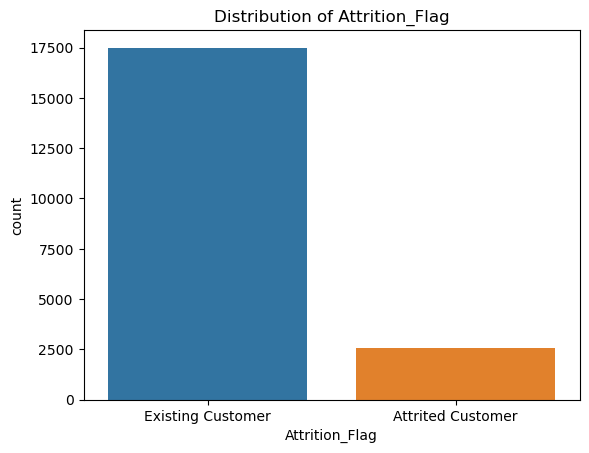

In [9]:
sns.countplot(x='Attrition_Flag', data=credit_info)
plt.title('Distribution of Attrition_Flag')
plt.show()

## Distribusi  Card Category

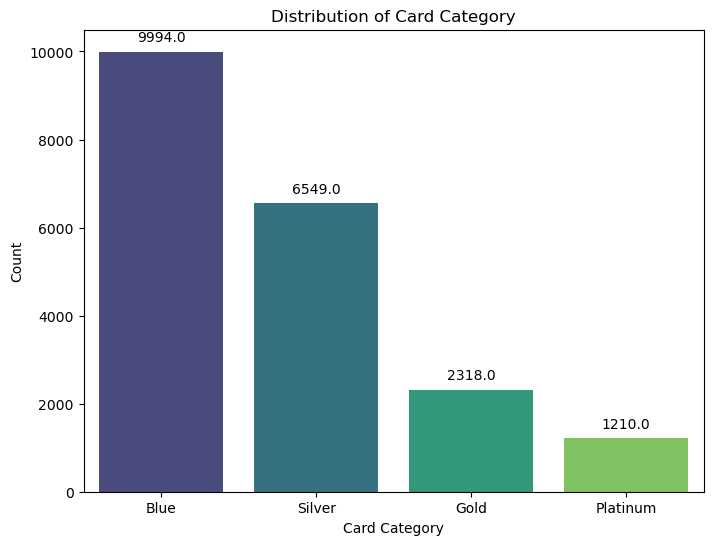

In [10]:
# Membuat bar chart untuk distribusi Card_Category
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Card_Category', data=credit_info, palette='viridis')

# Menambahkan keterangan jumlah per kategori kartu
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Card Category')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()

## Distribusi card pada customer yang churn

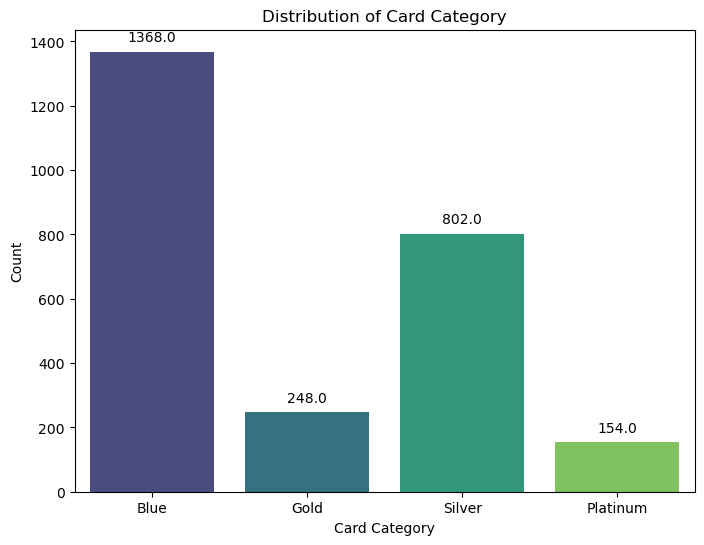

In [11]:
churn_data = credit_info[credit_info['Attrition_Flag'] == 'Attrited Customer']
# Membuat bar chart untuk distribusi Card_Category
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Card_Category', data=churn_data, palette='viridis')

# Menambahkan keterangan jumlah per kategori kartu
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Card Category')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()

## Visualisasi total transaksi per Jenis Kartu

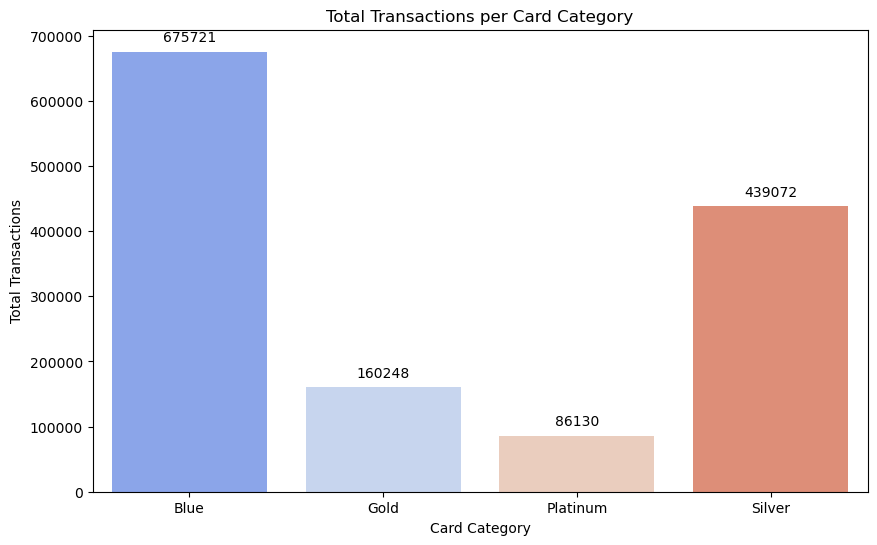

In [12]:
# Menghitung total transaksi per jenis Card_Category
total_transactions = credit_info.groupby('Card_Category')['Total_Trans_Ct'].sum().reset_index()

# Membuat bar chart untuk total transaksi per jenis Card_Category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Card_Category', y='Total_Trans_Ct', data=total_transactions, palette='coolwarm')

# Menambahkan label keterangan jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Transactions per Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Transactions')

plt.show()

#  Distribusi Kategori Pendapatan

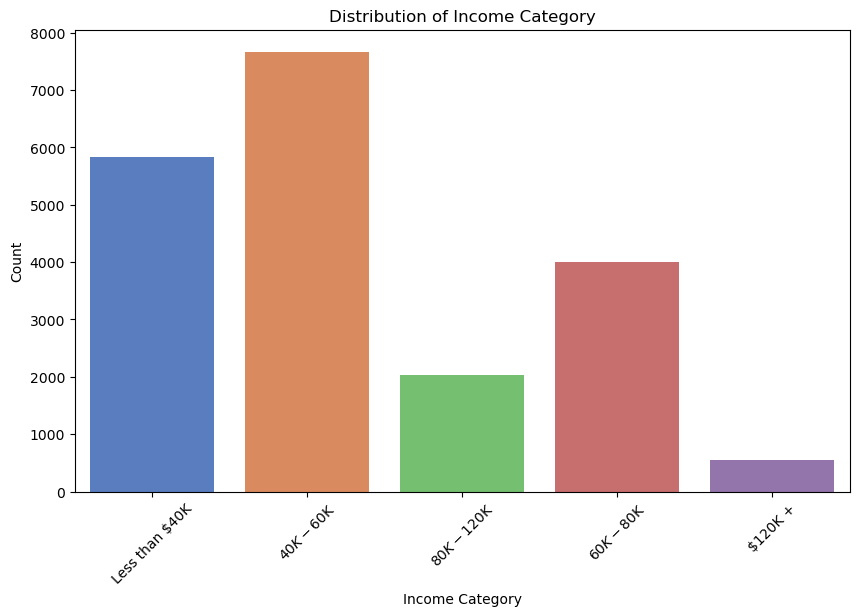

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', data=credit_info, palette='muted')
plt.title('Distribution of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##  Box plot untuk membandingkan distribusi pendapatan pada setiap kategori churn

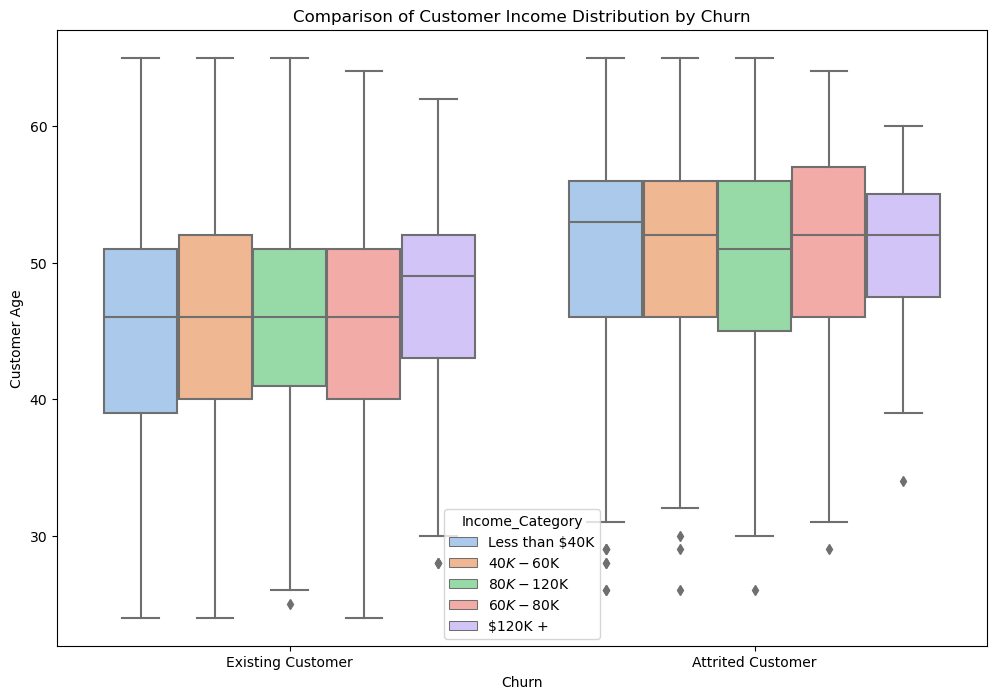

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=credit_info, hue='Income_Category', palette='pastel')
plt.title('Comparison of Customer Income Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Age')
plt.show()

## Distribusi berdasar Marial Status dan Education Level

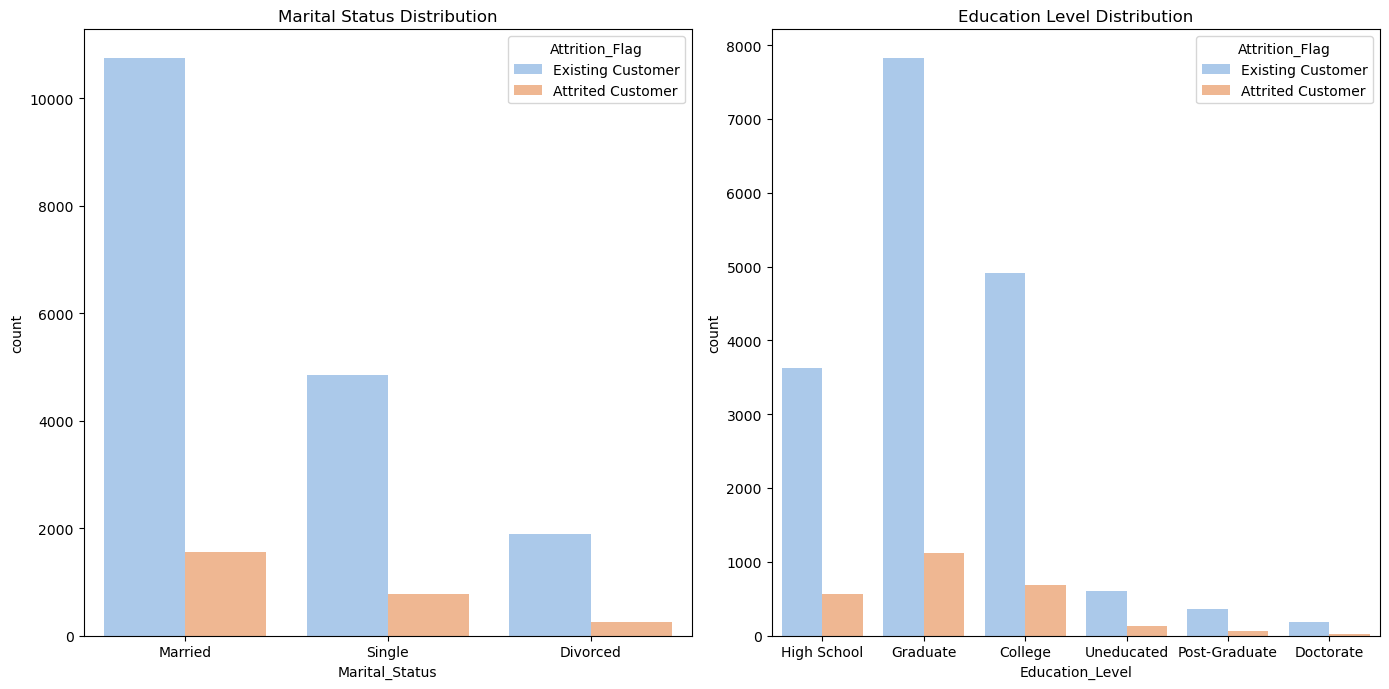

In [15]:
# Filter data untuk pelanggan yang churn
churn_data = credit_info[credit_info['Attrition_Flag'] == 'Attrited Customer']

# Bar chart untuk Marital Status
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x='Marital_Status', data=credit_info, hue='Attrition_Flag', palette='pastel')
plt.title('Marital Status Distribution')

# Bar chart untuk Education Level
plt.subplot(1, 2, 2)
sns.countplot(x='Education_Level', data=credit_info, hue='Attrition_Flag', palette='pastel')
plt.title('Education Level Distribution')

plt.tight_layout()
plt.show()

## Visual Komposisi Pelanggan berdasar Gender

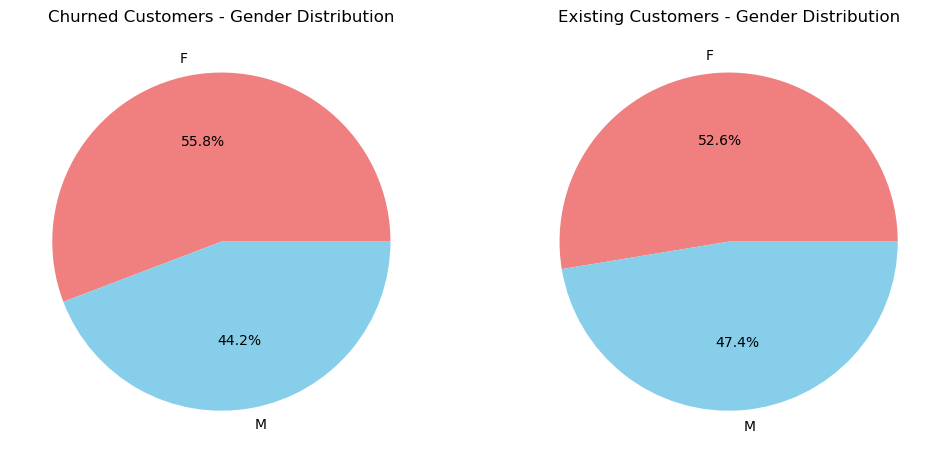

In [16]:
churn_data = credit_info[credit_info['Attrition_Flag'] == 'Attrited Customer']
existing_data = credit_info[credit_info['Attrition_Flag'] == 'Existing Customer']

# Pie chart untuk Gender Distribution pada pelanggan yang Churn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
churn_gender_distribution = churn_data['Gender'].value_counts()
plt.pie(churn_gender_distribution, labels=churn_gender_distribution.index, 
        autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Churned Customers - Gender Distribution')

# Pie chart untuk Gender Distribution pada pelanggan yang Existing
plt.subplot(1, 2, 2)
existing_gender_distribution = existing_data['Gender'].value_counts()
plt.pie(existing_gender_distribution, labels=existing_gender_distribution.index, 
        autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Existing Customers - Gender Distribution')

plt.show()

### Data Understanding for credit_finance

In [17]:
credit_finance

,CLIENTNUM,Attrition_Flag,Year,Quarter,Date,Type,Trans_Amount,Revenue
0,708082083,Existing Customer,2018,Q1,"Q1,2018",Shop,120.1200,2.40240
1,708083283,Attrited Customer,2018,Q1,"Q1,2018",Shop,135.5550,2.71110
2,708084558,Attrited Customer,2018,Q1,"Q1,2018",Shop,396.2700,7.92540
3,708085458,Existing Customer,2018,Q1,"Q1,2018",Shop,122.9550,2.45910
4,708086958,Existing Customer,2018,Q1,"Q1,2018",Shop,134.6400,2.69280
...,...,...,...,...,...,...,...,...
306871,721164483,Existing Customer,2019,Q4,"Q4,2019",Cash,56.5440,2.82720
306872,708095133,Existing Customer,2019,Q4,"Q4,2019",Cash,238.9592,11.94796
306873,900202780,Existing Customer,2019,Q4,"Q4,2019",Cash,13.6496,0.68248
306874,779770683,Existing Customer,2019,Q4,"Q4,2019",Cash,60.1008,3.00504


In [18]:
credit_finance.describe()

,CLIENTNUM,Year,Trans_Amount,Revenue
count,3.068760e+05,306876.000000,306876.000000,306876.000000
mean,7.516599e+08,2018.499381,239.960680,6.815908
std,5.533922e+07,0.500000,336.611644,8.825891
min,7.080821e+08,2018.000000,0.000000,0.000000
25%,7.135329e+08,2018.000000,50.490000,1.688865
50%,7.189092e+08,2018.000000,125.467500,3.663747
75%,7.833819e+08,2019.000000,282.398525,8.652000
max,9.002031e+08,2019.000000,5373.900000,150.202500


In [19]:
credit_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306876 entries, 0 to 306875
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CLIENTNUM       306876 non-null  int64  
 1   Attrition_Flag  306876 non-null  object 
 2   Year            306876 non-null  int64  
 3   Quarter         306876 non-null  object 
 4   Date            306876 non-null  object 
 5   Type            306876 non-null  object 
 6   Trans_Amount    306876 non-null  float64
 7   Revenue         306876 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 18.7+ MB


In [20]:
missing_values = credit_finance.isnull().sum()
percentage_missing = (missing_values / len(credit_finance)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
print(missing_data)

                Missing Values  Percentage
CLIENTNUM                    0         0.0
Attrition_Flag               0         0.0
Year                         0         0.0
Quarter                      0         0.0
Date                         0         0.0
Type                         0         0.0
Trans_Amount                 0         0.0
Revenue                      0         0.0


In [21]:
#cek nilai unik di dataframe
unique_counts = credit_finance.nunique()
print(unique_counts)

CLIENTNUM          11571
Attrition_Flag         2
Year                   2
Quarter                4
Date                   8
Type                   4
Trans_Amount      125931
Revenue           133015
dtype: int64


## Korelasi antara Trans_Amount dengan Revenue

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_1663/2025431076.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Revenue', y='Trans_Amount', data=credit_finance, palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


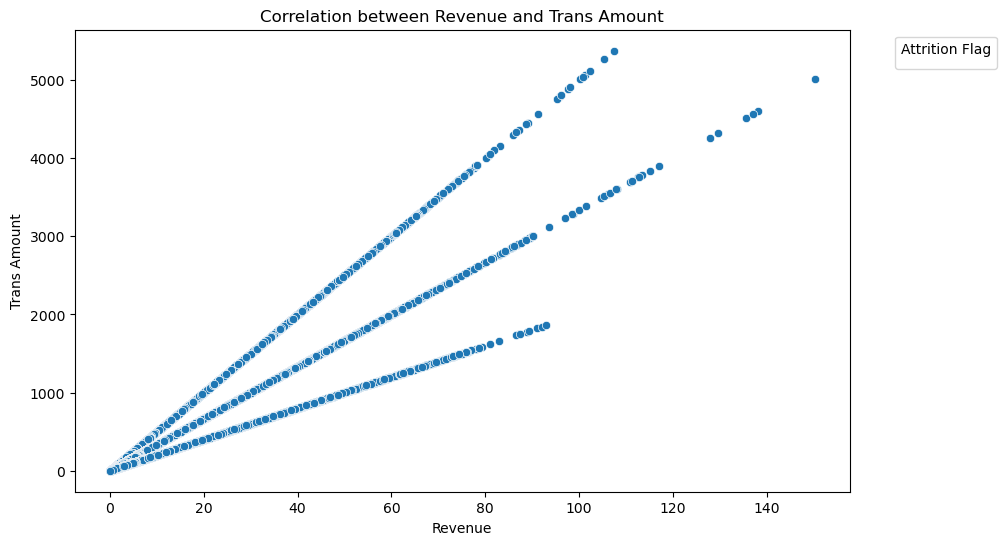

In [22]:
# Scatter plot untuk korelasi antara Pendapatan dan Jumlah Transaksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Trans_Amount', data=credit_finance, palette='coolwarm')
plt.title('Correlation between Revenue and Trans Amount')
plt.xlabel('Revenue')
plt.ylabel('Trans Amount')
plt.legend(title='Attrition Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Distribusi jumlah transaksi per jenis transaksi

/var/folders/sh/_6wg56x97y7b5__x4qlx17hm0000gn/T/ipykernel_1663/2036832622.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Trans_Amount', data=credit_finance, ci=None)


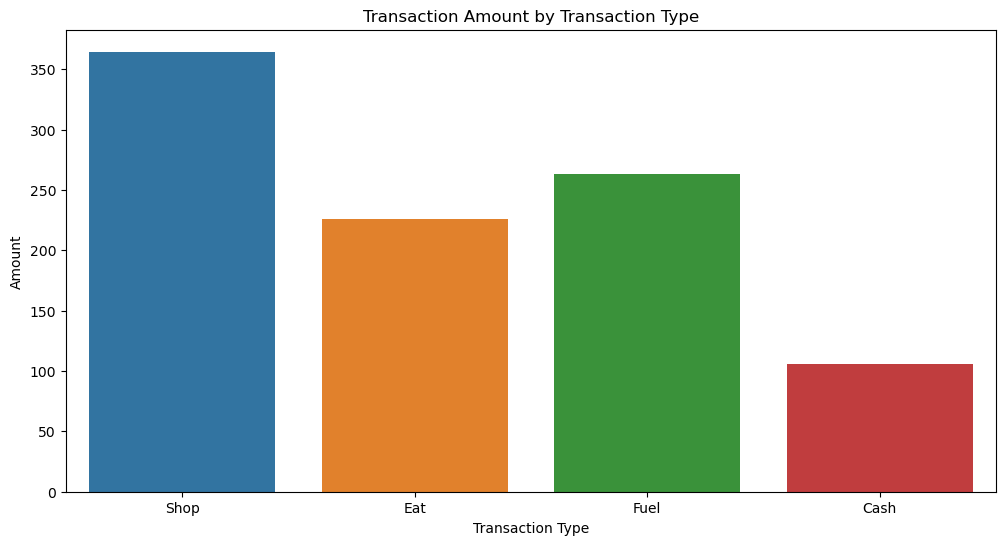

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Trans_Amount', data=credit_finance, ci=None)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

# Data Preparation

In [24]:
credit_info['Customer_Age'] = pd.to_numeric(credit_info['Customer_Age'], errors='coerce')

credit_info_sorted = credit_info.sort_values(by='Customer_Age', ascending=False)
latest_records = credit_info_sorted.drop_duplicates(subset='CLIENTNUM', keep='first')

# Group by CLIENTNUM and calculate the sum for specific columns
sum_trans_amount = credit_info.groupby('CLIENTNUM')[['Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
                                                     'Total_Revolving_Bal', 'Total_Trans_Ct']].sum().reset_index()
# Group by CLIENTNUM and calculate the mean for specific columns
average_values = credit_info.groupby('CLIENTNUM')[['Avg_Open_To_Buy', 'Avg_Utilization_Ratio']].mean().reset_index()

# Merge the dataframes
latest_records = pd.merge(latest_records, sum_trans_amount, on='CLIENTNUM', how='left')
latest_records = pd.merge(latest_records, average_values, on='CLIENTNUM', how='left')

# Display the resulting dataframe
latest_records

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio_x,Quarter,Year,Date_Leave,Months_Inactive_12_mon_y,Contacts_Count_12_mon_y,Total_Revolving_Bal_y,Total_Trans_Ct_y,Avg_Open_To_Buy_y,Avg_Utilization_Ratio_y
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,...,0.519,none,2018,"none,2018",4,4,1633,93,691.3,0.4795
1,770721858,Existing Customer,65,M,1,Graduate,Married,$40K - $60K,Blue,56,...,0.711,none,2018,"none,2018",2,10,3138,110,1022.0,0.4455
2,780689733,Existing Customer,65,M,0,College,Single,$40K - $60K,Silver,68,...,0.080,none,2019,"none,2019",5,4,1542,139,10699.0,0.0680
3,778357458,Existing Customer,65,F,3,Graduate,Married,Less than $40K,Blue,24,...,0.611,none,2018,"none,2018",6,6,2364,144,779.0,0.5905
4,778247358,Existing Customer,65,M,1,Graduate,Single,$40K - $60K,Silver,68,...,0.070,none,2019,"none,2019",6,4,502,146,7636.0,0.0350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,900203138,Existing Customer,24,F,2,College,Married,Less than $40K,Silver,53,...,0.090,none,2019,"none,2019",2,3,467,32,9291.0,0.0900
11567,900203137,Existing Customer,24,F,0,Graduate,Single,$60K - $80K,Silver,57,...,0.050,none,2019,"none,2019",2,3,598,35,11722.0,0.0500
11568,900203136,Existing Customer,24,F,0,College,Single,$60K - $80K,Silver,24,...,0.050,none,2019,"none,2019",4,3,400,53,8022.0,0.0500
11569,900201723,Existing Customer,24,F,0,High School,Single,$40K - $60K,Silver,41,...,0.210,none,2019,"none,2019",4,4,1306,114,6152.0,0.2100


In [25]:
# Karena adanya penambahan kolumn akibat agregasi maka kolom lama yang ada inisial x dibelakangnya akan dihapus
columntodrop = ['Months_Inactive_12_mon_x', 'Contacts_Count_12_mon_x', 'Total_Revolving_Bal_x', 
                'Avg_Open_To_Buy_x', 'Total_Trans_Ct_x', 'Avg_Utilization_Ratio_x']

# mengubah nama dataFrame supaya relevan dan sesuai yang sudah difilter
credit_info = latest_records.drop(columns=columntodrop)

In [26]:
# melakukan rename terhadap kolom yang tadinya hasil merger supaya menjadi relevan
rename_columns = {'Months_Inactive_12_mon_y': 'Months_Inactive',
               'Contacts_Count_12_mon_y': 'Contacts_Count',
                 'Total_Revolving_Bal_y': 'Total_Revolving_Bal', 
                'Total_Trans_Ct_y': 'Total_Trans_Ct', 
                 'Avg_Open_To_Buy_y': 'Avg_Open_To_Buy', 
                 'Avg_Utilization_Ratio_y': 'Avg_Utilization_Ratio'}

# Mengganti nama banyak kolom sekaligus
credit_info = credit_info.rename(columns=rename_columns)

In [27]:
# disini akan memfilter dataFrame kedua yang mengandung beberapa transaksi yang dilakukan nasabah
# tentunya untuk menghindari data duplicate disini menggunakan group by berdasarkan CLIENTNUM (identitas) dan diambil dua kolom yang relevan yaitu 
# 'Trans_Amount' dan 'Revenue'
filtered_finance = credit_finance.groupby('CLIENTNUM', as_index=False).agg({'Trans_Amount': 'sum',
                                                                            'Revenue': 'sum'})

# setelah sesuai maka digabungkanlah DataFrame 'cust_credit' dan 'grouped_finance' berdasarkan 'CLIENTNUM'
data_credit = pd.merge(credit_info, filtered_finance, on='CLIENTNUM', how='left')

In [28]:
#ubah tipe data 
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical_columns:
    data_credit[col] = data_credit[col].astype('category')
    
data_credit['CLIENTNUM'] = data_credit['CLIENTNUM'].astype(str)

In [29]:
# Memisahkan tahun dan kuartal
data_credit[['Quarter', 'Year']] = data_credit['Date_Leave'].str.split(',', expand=True)

# Mengonversi kuartal menjadi nilai numerik (hilangkan 'none' dengan 0)
data_credit['Quarter'] = data_credit['Quarter'].apply(lambda x: 0 if x == 'none' else int(x[1:]))

# Penyesuaian untuk menghitung awal dari setiap kuartal
data_credit['Month_Start'] = data_credit.apply(lambda x: (x['Quarter'] - 1) * 3 + 1 if x['Quarter'] > 0 else None, axis=1)

# Ubah 'Year_Quarter' menjadi datetime dengan format 'YYYY-MM-DD'
data_credit['Year_Quarter'] = pd.to_datetime(data_credit.apply(lambda x: f"{x['Year']}-{'{:02d}'.format(int(x['Month_Start']))}-01" 
                                                               if  pd.notna(x['Month_Start']) else None, axis=1), errors='coerce')

# Hapus kolom yang tidak diperlukan
data_credit = data_credit.drop(columns=['Quarter', 'Year', 'Month_Start'])

In [30]:
data_credit['Year_Quarter'].unique()

<DatetimeArray>
[                'NaT', '2018-10-01 00:00:00', '2018-07-01 00:00:00',
 '2018-01-01 00:00:00', '2018-04-01 00:00:00', '2019-07-01 00:00:00',
 '2019-04-01 00:00:00', '2019-01-01 00:00:00', '2019-10-01 00:00:00']
Length: 9, dtype: datetime64[ns]

In [31]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CLIENTNUM                 11571 non-null  object        
 1   Attrition_Flag            11571 non-null  object        
 2   Customer_Age              11571 non-null  int64         
 3   Gender                    11571 non-null  category      
 4   Dependent_count           11571 non-null  int64         
 5   Education_Level           11571 non-null  category      
 6   Marital_Status            11571 non-null  category      
 7   Income_Category           11571 non-null  category      
 8   Card_Category             11571 non-null  category      
 9   Months_on_book            11571 non-null  int64         
 10  Total_Relationship_Count  11571 non-null  int64         
 11  Credit_Limit              11571 non-null  float64       
 12  Date_Leave        

## Visualisasi

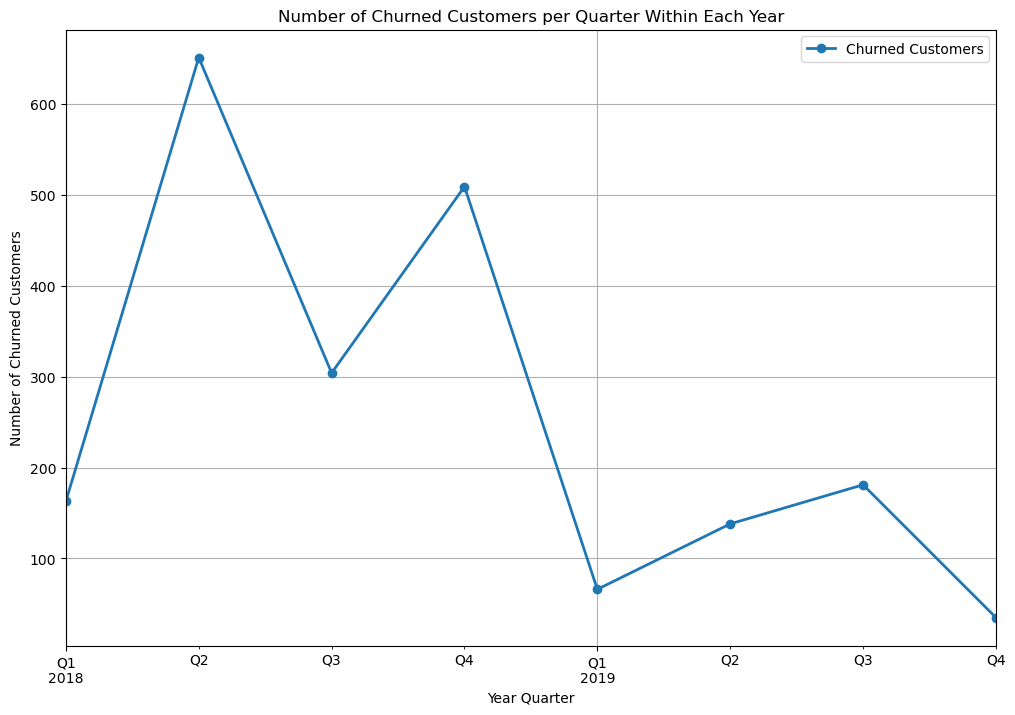

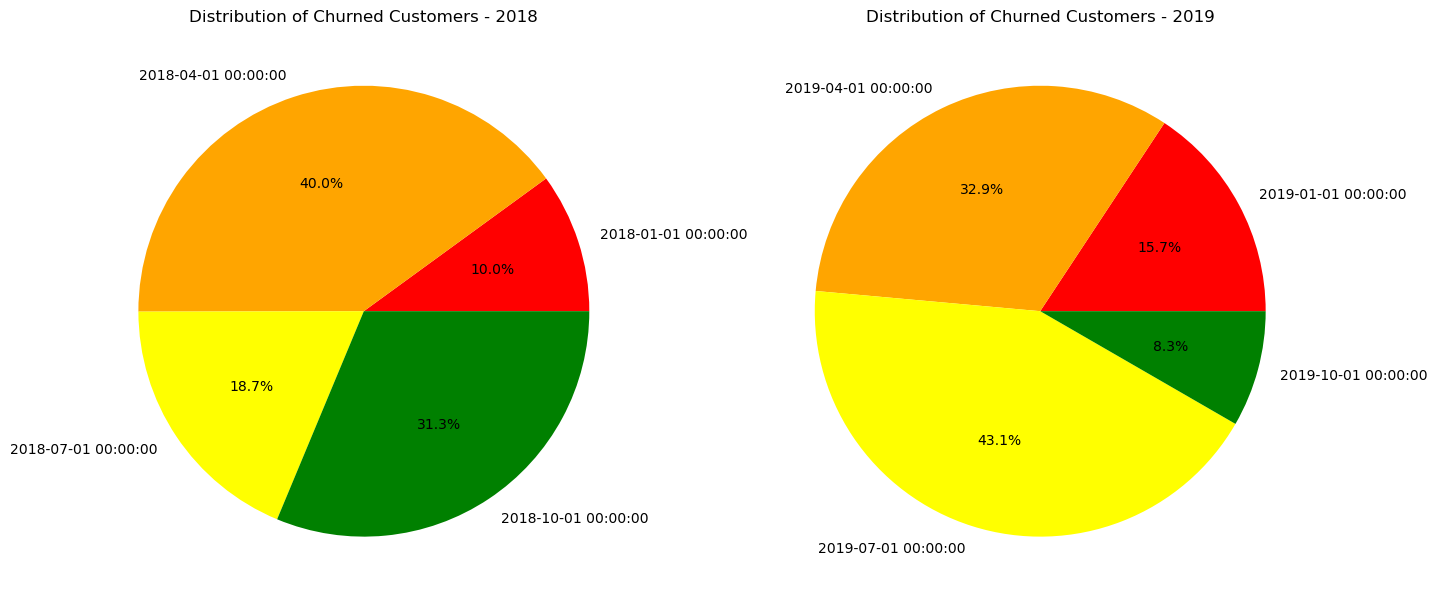

In [32]:
# Visualisasi untuk customer yang churn per quarter
churned_per_year_quarter = data_credit[data_credit['Attrition_Flag'] == 'Attrited Customer'].groupby(['Year_Quarter']).size()

fig, ax = plt.subplots(figsize=(12, 8))
churned_per_year_quarter.plot(marker='o', linestyle='-', linewidth=2, label='Churned Customers')
ax.set_title('Number of Churned Customers per Quarter Within Each Year')
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Number of Churned Customers')
ax.legend()
ax.grid(True)
plt.show()

# Filter pelanggan yang churned
churned_customers = data_credit[data_credit['Attrition_Flag'] == 'Attrited Customer']

# Visualisasi: Pie chart - Distribution of churned customers across quarters for each year
unique_years = churned_customers['Year_Quarter'].dt.year.unique()

fig, axes = plt.subplots(nrows=1, ncols=len(unique_years), figsize=(16, 8))

for i, year in enumerate(unique_years):
    churned_per_year_quarter = churned_customers[churned_customers['Year_Quarter'].dt.year == year].groupby(['Year_Quarter']).size()
    axes[i].pie(churned_per_year_quarter, labels=churned_per_year_quarter.index, autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green'])
    axes[i].set_title(f'Distribution of Churned Customers - {year}')

plt.show()

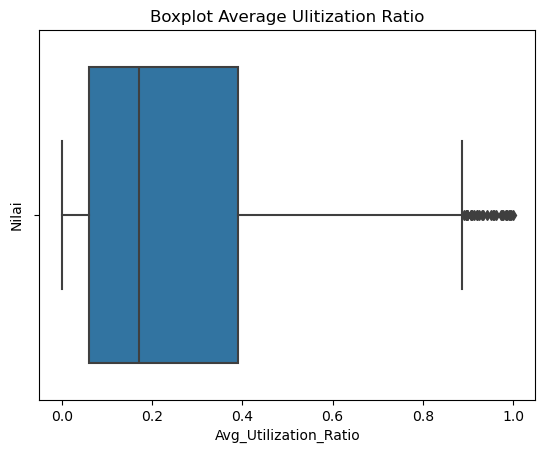

In [33]:
sns.boxplot(x='Avg_Utilization_Ratio', data=data_credit)
plt.title('Boxplot Average Ulitization Ratio')
plt.ylabel('Nilai')
plt.show()

### Hapus Outlier

In [34]:
# Menentukan kolom numerik yang akan dihapus outlier-nya
numeric_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                   'Credit_Limit', 'Months_Inactive', 'Contacts_Count', 'Total_Revolving_Bal', 'Total_Trans_Ct',
                   'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Trans_Amount', 'Revenue']

# Menghitung IQR 
Q1 = data_credit[numeric_columns].quantile(0.25)
Q3 = data_credit[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# deklarasi lower dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Proses membersihkan data outlier
data_credit_cleaned = data_credit.copy()
for column in numeric_columns:
    data_credit_cleaned = data_credit_cleaned[(data_credit_cleaned[column] >= lower_bound[column]) & 
                                              (data_credit_cleaned[column] <= upper_bound[column])]

data_credit = data_credit_cleaned

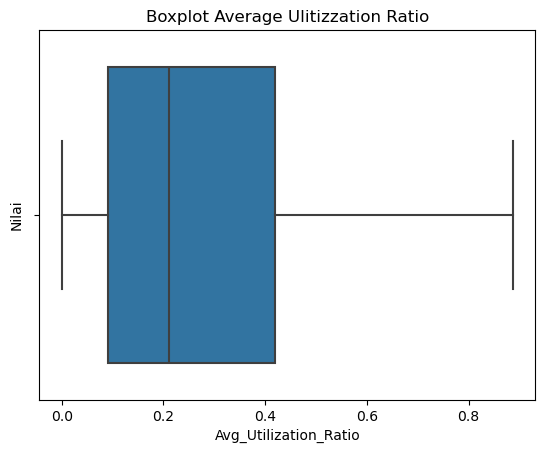

In [35]:
sns.boxplot(x='Avg_Utilization_Ratio', data=data_credit)
plt.title('Boxplot Average Ulitizzation Ratio')
plt.ylabel('Nilai')
plt.show()

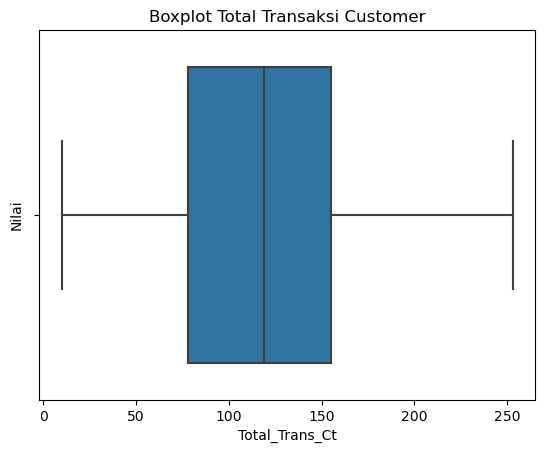

In [36]:
sns.boxplot(x='Total_Trans_Ct', data=data_credit)
plt.title('Boxplot Total Transaksi Customer')
plt.ylabel('Nilai')
plt.show()

In [37]:
data_credit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Date_Leave,Months_Inactive,Contacts_Count,Total_Revolving_Bal,Total_Trans_Ct,Avg_Open_To_Buy,Avg_Utilization_Ratio,Trans_Amount,Revenue,Year_Quarter
0,712672083,Existing Customer,65,F,0,High School,Married,Less than $40K,Blue,36,...,"none,2018",4,4,1633,93,691.3,0.4795,3562.3152,100.959826,NaT
1,770721858,Existing Customer,65,M,1,Graduate,Married,$40K - $60K,Blue,56,...,"none,2018",2,10,3138,110,1022.0,0.4455,6037.0000,173.662330,NaT
2,780689733,Existing Customer,65,M,0,College,Single,$40K - $60K,Silver,68,...,"none,2019",5,4,1542,139,10699.0,0.0680,9666.0000,271.975751,NaT
3,778357458,Existing Customer,65,F,3,Graduate,Married,Less than $40K,Blue,24,...,"none,2018",6,6,2364,144,779.0,0.5905,3280.3856,91.356332,NaT
4,778247358,Existing Customer,65,M,1,Graduate,Single,$40K - $60K,Silver,68,...,"none,2019",6,4,502,146,7636.0,0.0350,6214.0000,176.253320,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,900203138,Existing Customer,24,F,2,College,Married,Less than $40K,Silver,53,...,"none,2019",2,3,467,32,9291.0,0.0900,1239.0000,37.098138,NaT
11567,900203137,Existing Customer,24,F,0,Graduate,Single,$60K - $80K,Silver,57,...,"none,2019",2,3,598,35,11722.0,0.0500,6581.0000,196.041409,NaT
11568,900203136,Existing Customer,24,F,0,College,Single,$60K - $80K,Silver,24,...,"none,2019",4,3,400,53,8022.0,0.0500,672.0000,18.210528,NaT
11569,900201723,Existing Customer,24,F,0,High School,Single,$40K - $60K,Silver,41,...,"none,2019",4,4,1306,114,6152.0,0.2100,1172.0000,31.760028,NaT


## Encoding

In [38]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10038 entries, 0 to 11570
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CLIENTNUM                 10038 non-null  object        
 1   Attrition_Flag            10038 non-null  object        
 2   Customer_Age              10038 non-null  int64         
 3   Gender                    10038 non-null  category      
 4   Dependent_count           10038 non-null  int64         
 5   Education_Level           10038 non-null  category      
 6   Marital_Status            10038 non-null  category      
 7   Income_Category           10038 non-null  category      
 8   Card_Category             10038 non-null  category      
 9   Months_on_book            10038 non-null  int64         
 10  Total_Relationship_Count  10038 non-null  int64         
 11  Credit_Limit              10038 non-null  float64       
 12  Date_Leave             

In [39]:
selected_columns = ['Attrition_Flag', 'Gender', 'Education_Level','Marital_Status', 
                    'Income_Category','Card_Category'
                   ]

# Menampilkan nilai unik di kolom-kolom tertentu
for column in selected_columns:
    unique_values = data_credit[column].unique()
    print(f"Unique values in column {column}:", unique_values)

Unique values in column Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Unique values in column Gender: ['F', 'M']
Categories (2, object): ['F', 'M']
Unique values in column Education_Level: ['High School', 'Graduate', 'College', 'Uneducated', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']
Unique values in column Marital_Status: ['Married', 'Single', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
Unique values in column Income_Category: ['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K']
Unique values in column Card_Category: ['Blue', 'Silver', 'Gold', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


In [40]:
# Membuat peta encoding manual untuk setiap kolom
attrition_flag_mapping = {'Attrited Customer': 1, 'Existing Customer': 0}
gender_mapping = {'F': 0, 'M': 1}
education_level_mapping = {'High School': 0, 'Graduate': 1, 'College': 2, 'Uneducated': 3, 'Post-Graduate': 4, 'Doctorate': 5}
marital_status_mapping = {'Divorced': 0, 'Married': 1, 'Single': 2}
income_category_mapping = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
card_category_mapping = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

# Proses encoding memacu peta yang udah ditentukan
data_credit['Attrition_Flag'] = data_credit['Attrition_Flag'].map(attrition_flag_mapping)
data_credit['Gender'] = data_credit['Gender'].map(gender_mapping)
data_credit['Education_Level'] = data_credit['Education_Level'].map(education_level_mapping)
data_credit['Marital_Status'] = data_credit['Marital_Status'].map(marital_status_mapping)
data_credit['Income_Category'] = data_credit['Income_Category'].map(income_category_mapping)
data_credit['Card_Category'] = data_credit['Card_Category'].map(card_category_mapping)

# cek hasil
for column in ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    unique_values = data_credit[column].unique()
    print(f"Encoded values in column {column}:", unique_values)


Encoded values in column Attrition_Flag: [0 1]
Encoded values in column Gender: [0, 1]
Categories (2, int64): [0, 1]
Encoded values in column Education_Level: [0, 1, 2, 3, 4, 5]
Categories (6, int64): [2, 5, 1, 0, 4, 3]
Encoded values in column Marital_Status: [1, 2, 0]
Categories (3, int64): [0, 1, 2]
Encoded values in column Income_Category: [0, 1, 3, 2, 4]
Categories (5, int64): [4, 1, 2, 3, 0]
Encoded values in column Card_Category: [0, 1, 2, 3]
Categories (4, int64): [0, 2, 3, 1]


In [41]:
data_credit

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Date_Leave,Months_Inactive,Contacts_Count,Total_Revolving_Bal,Total_Trans_Ct,Avg_Open_To_Buy,Avg_Utilization_Ratio,Trans_Amount,Revenue,Year_Quarter
0,712672083,0,65,0,0,0,1,0,0,36,...,"none,2018",4,4,1633,93,691.3,0.4795,3562.3152,100.959826,NaT
1,770721858,0,65,1,1,1,1,1,0,56,...,"none,2018",2,10,3138,110,1022.0,0.4455,6037.0000,173.662330,NaT
2,780689733,0,65,1,0,2,2,1,1,68,...,"none,2019",5,4,1542,139,10699.0,0.0680,9666.0000,271.975751,NaT
3,778357458,0,65,0,3,1,1,0,0,24,...,"none,2018",6,6,2364,144,779.0,0.5905,3280.3856,91.356332,NaT
4,778247358,0,65,1,1,1,2,1,1,68,...,"none,2019",6,4,502,146,7636.0,0.0350,6214.0000,176.253320,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,900203138,0,24,0,2,2,1,0,1,53,...,"none,2019",2,3,467,32,9291.0,0.0900,1239.0000,37.098138,NaT
11567,900203137,0,24,0,0,1,2,2,1,57,...,"none,2019",2,3,598,35,11722.0,0.0500,6581.0000,196.041409,NaT
11568,900203136,0,24,0,0,2,2,2,1,24,...,"none,2019",4,3,400,53,8022.0,0.0500,672.0000,18.210528,NaT
11569,900201723,0,24,0,0,0,2,1,1,41,...,"none,2019",4,4,1306,114,6152.0,0.2100,1172.0000,31.760028,NaT


# Visualisasi Korelasi

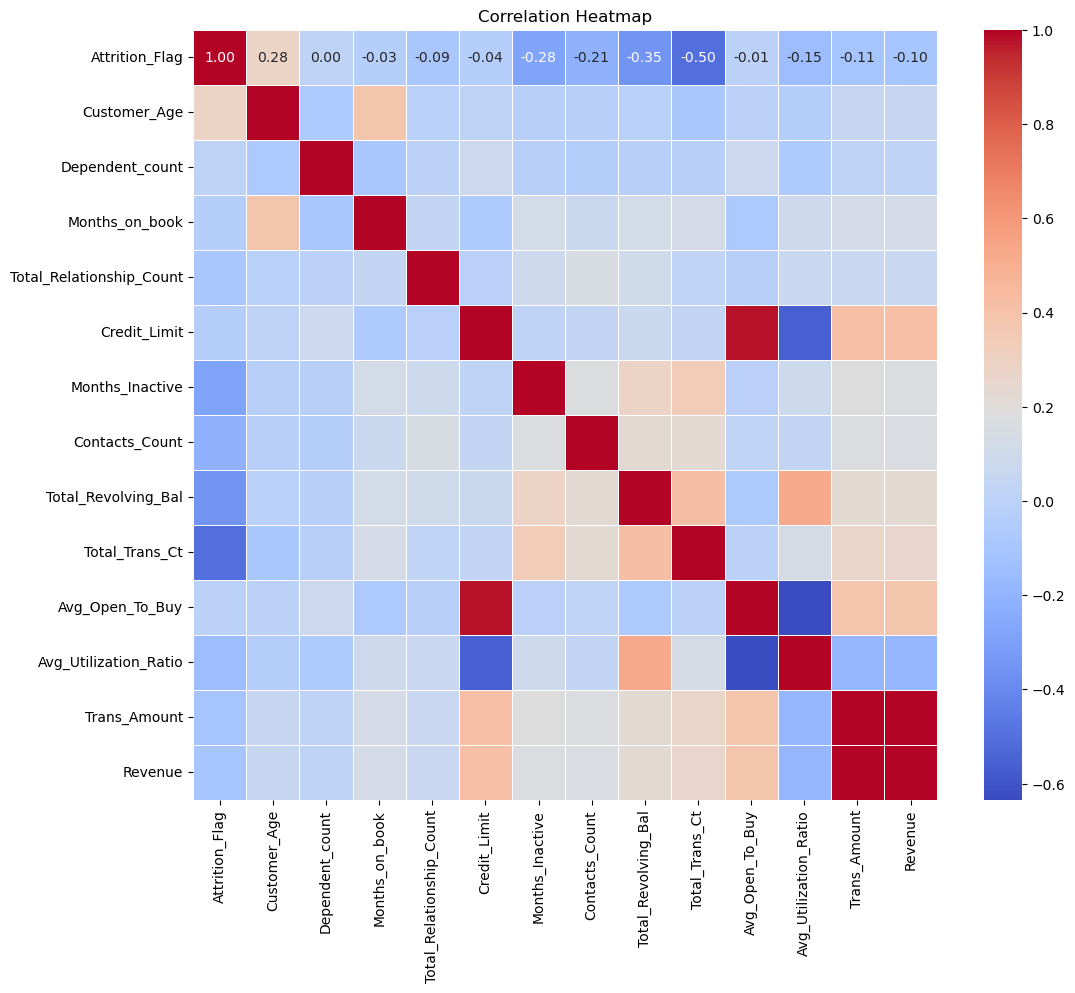

In [42]:
# Memilih variabel-variabel 
selected_variables = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Credit_Limit', 'Date_Leave',
       'Months_Inactive', 'Contacts_Count', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio',
       'Trans_Amount', 'Revenue', 'Year_Quarter']
# Subset dataset menggunakan variabel-variabel utama
selected_data = data_credit[selected_variables]

# Exclude non-numeric columns from correlation analysis
numeric_columns = selected_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Membuat visual korelasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Feature Selection menggunakan Random Forest

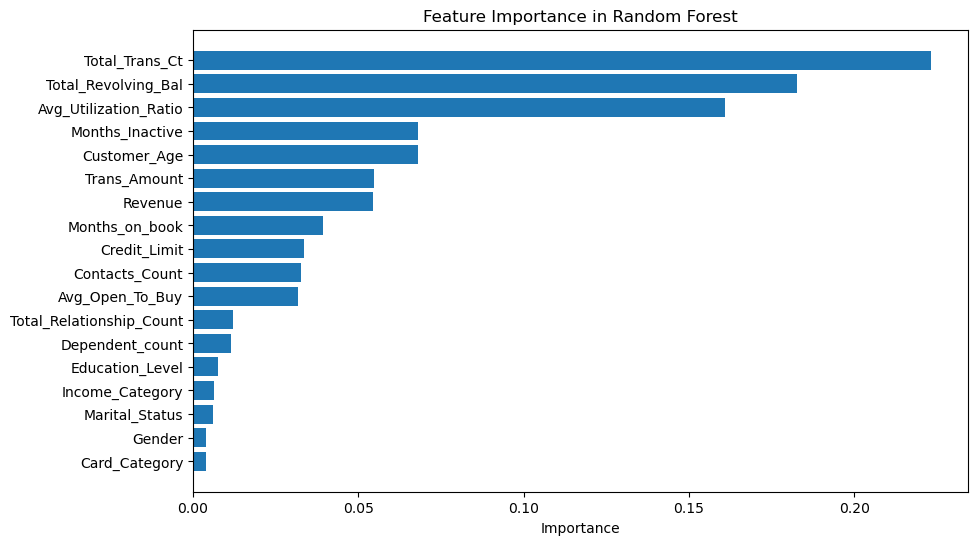

In [43]:
# Pilih variabel fitur dan target
features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
            'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
            'Credit_Limit', 'Months_Inactive', 'Contacts_Count', 'Total_Revolving_Bal',
            'Total_Trans_Ct', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Trans_Amount', 'Revenue']

target = 'Attrition_Flag'

# Pisahkan variabel independen (X) dan dependen (y)
X = data_credit[features]
y = data_credit[target]

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Menghitung feature importance
feature_importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Modelling dan Evaluation

In [44]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Customer_Age', 'Avg_Utilization_Ratio', 'Months_Inactive']
target = 'Attrition_Flag'

# Pisahkan variabel independen (X) dan dependen (y)
X = data_credit[features]
y = data_credit[target]

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lakukan oversampling karena data tidak seimbang
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Normalisasi skala data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada set pengujian
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM
print("\nSupport Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)


Support Vector Machine (SVM)
Accuracy: 0.9307768924302788
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1658
           1       0.82      0.77      0.80       350

    accuracy                           0.93      2008
   macro avg       0.89      0.87      0.88      2008
weighted avg       0.93      0.93      0.93      2008

Confusion Matrix:
 [[1598   60]
 [  79  271]]


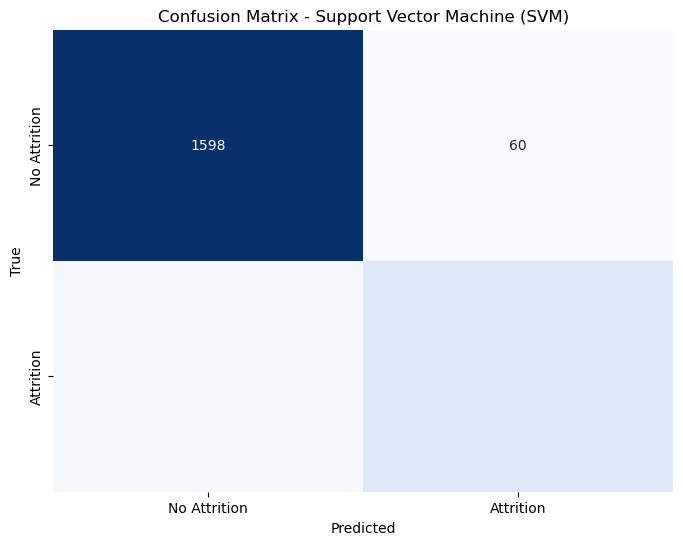

In [45]:

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

# Decision Tree

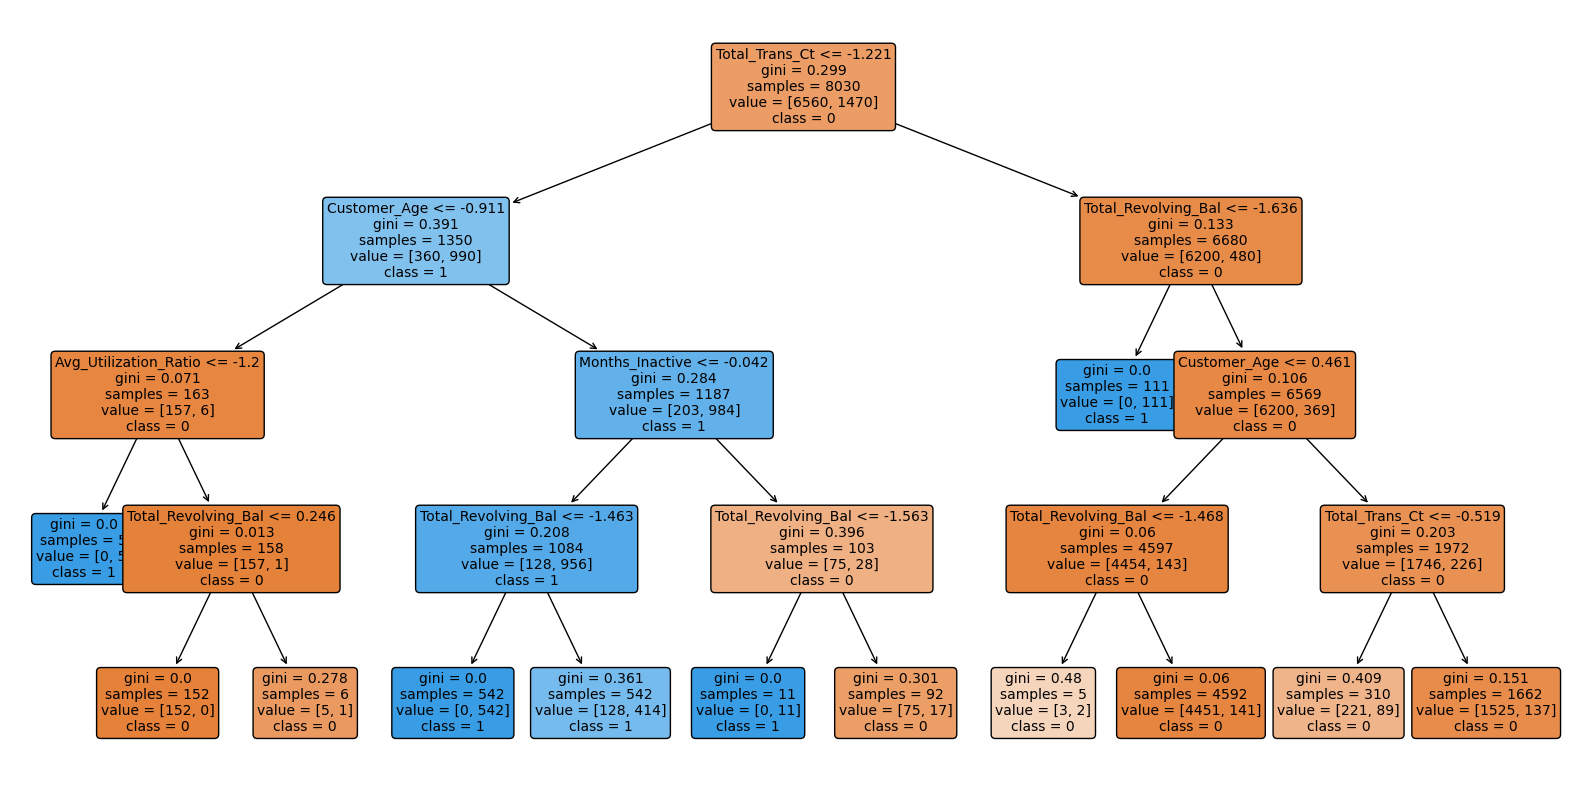

Accuracy: 0.9313
Confusion Matrix:
[[1625   33]
 [ 105  245]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1658
           1       0.88      0.70      0.78       350

    accuracy                           0.93      2008
   macro avg       0.91      0.84      0.87      2008
weighted avg       0.93      0.93      0.93      2008



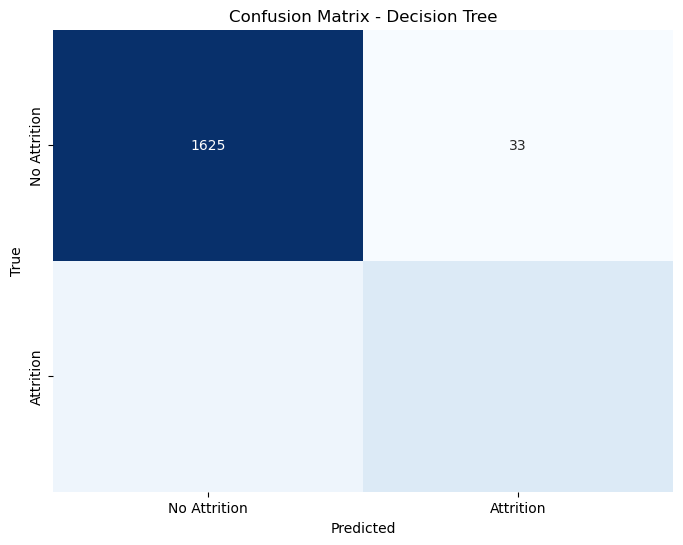

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur yang akan digunakan untuk prediksi
features = ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Customer_Age', 'Avg_Utilization_Ratio', 'Months_Inactive']


target = 'Attrition_Flag'

X = data_credit[features]
y = data_credit[target]

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


X_train_resampled, y_train_resampled = resample(X_train_normalized, y_train, random_state=42)


model = DecisionTreeClassifier(max_depth = 4, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=[str(cls) for cls in model.classes_], filled=True, 
          rounded=True, fontsize=10)
plt.savefig('decision_tree.png')
plt.show()

# Melakukan prediksi pada set pengujian
y_pred = model.predict(X_test_normalized)


accuracy_DT = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil
print(f'Accuracy: {accuracy_DT:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


conf_matrix_dt = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



# Explore Insight From Feature

In [47]:
# Membuat peta decoding manual untuk setiap kolom
attrition_flag_decoding = {1: 'Attrited Customer', 0: 'Existing Customer'}
gender_decoding = {0: 'F', 1: 'M'}
education_level_decoding = {0: 'High School', 1: 'Graduate', 2: 'College', 3: 'Uneducated', 4: 'Post-Graduate', 5: 'Doctorate'}
marital_status_decoding = {0: 'Divorced', 1: 'Married', 2: 'Single'}
income_category_decoding = {0: 'Less than $40K', 1: '$40K - $60K', 2: '$60K - $80K', 3: '$80K - $120K', 4: '$120K +'}
card_category_decoding = {0: 'Blue', 1: 'Silver', 2: 'Gold', 3: 'Platinum'}

# Terapkan peta decoding ke setiap kolom
data_credit_decoded = data_credit.copy()
data_credit_decoded['Attrition_Flag'] = data_credit_decoded['Attrition_Flag'].map(attrition_flag_decoding)
data_credit_decoded['Gender'] = data_credit_decoded['Gender'].map(gender_decoding)
data_credit_decoded['Education_Level'] = data_credit_decoded['Education_Level'].map(education_level_decoding)
data_credit_decoded['Marital_Status'] = data_credit_decoded['Marital_Status'].map(marital_status_decoding)
data_credit_decoded['Income_Category'] = data_credit_decoded['Income_Category'].map(income_category_decoding)
data_credit_decoded['Card_Category'] = data_credit_decoded['Card_Category'].map(card_category_decoding)

# Menampilkan hasil
for column in ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    unique_values = data_credit_decoded[column].unique()
    print(f"Decoded values in column {column}:", unique_values)

Decoded values in column Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Decoded values in column Gender: ['F', 'M']
Categories (2, object): ['F', 'M']
Decoded values in column Education_Level: ['High School', 'Graduate', 'College', 'Uneducated', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']
Decoded values in column Marital_Status: ['Married', 'Single', 'Divorced']
Categories (3, object): ['Divorced', 'Married', 'Single']
Decoded values in column Income_Category: ['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
Categories (5, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K']
Decoded values in column Card_Category: ['Blue', 'Silver', 'Gold', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']


In [48]:
data_credit = data_credit_decoded

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


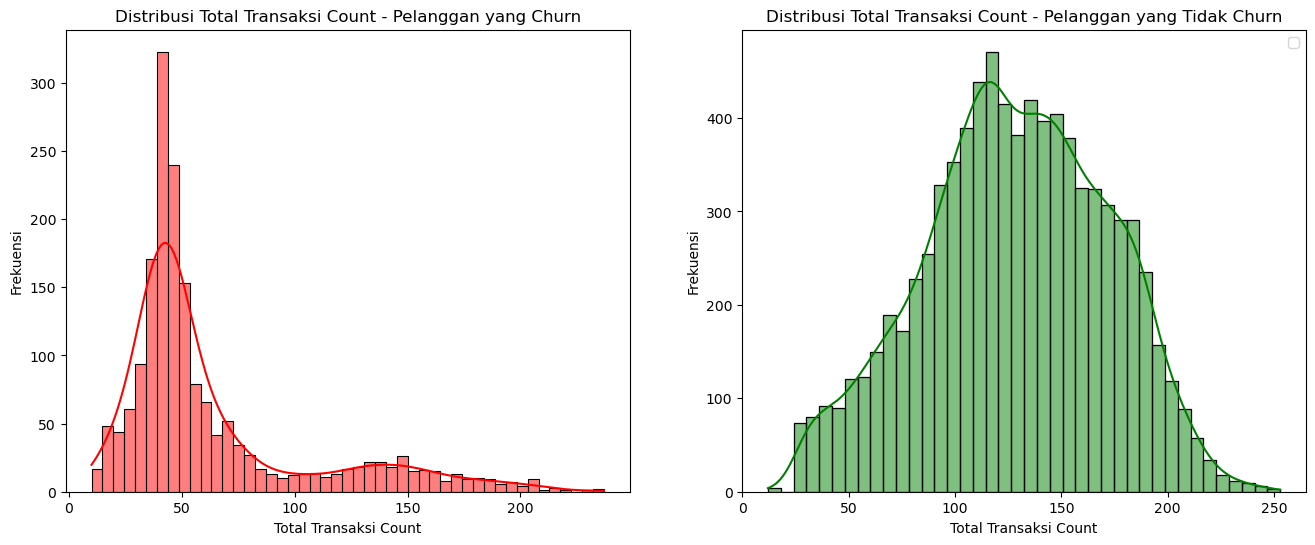

In [49]:
# Tentukan ukuran subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Filter pelanggan yang churned
churned_customers = data_credit[data_credit['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data_credit[data_credit['Attrition_Flag'] == 'Existing Customer']

# Plot histogram distribusi Total Transaksi Count untuk pelanggan yang churn
churned_plot = sns.histplot(churned_customers['Total_Trans_Ct'], kde=True, color='red', ax=axes[0])
churned_plot.set_title('Distribusi Total Transaksi Count - Pelanggan yang Churn')
churned_plot.set_xlabel('Total Transaksi Count')
churned_plot.set_ylabel('Frekuensi')

# Plot histogram distribusi Total Transaksi Count untuk pelanggan yang tidak churn
existing_plot = sns.histplot(existing_customers['Total_Trans_Ct'], kde=True, color='green', ax=axes[1])
existing_plot.set_title('Distribusi Total Transaksi Count - Pelanggan yang Tidak Churn')
existing_plot.set_xlabel('Total Transaksi Count')
existing_plot.set_ylabel('Frekuensi')

# Menambahkan label ke legend
churned_plot.set_label('Churned Customers')
existing_plot.set_label('Existing Customers')

# Tampilkan plot
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


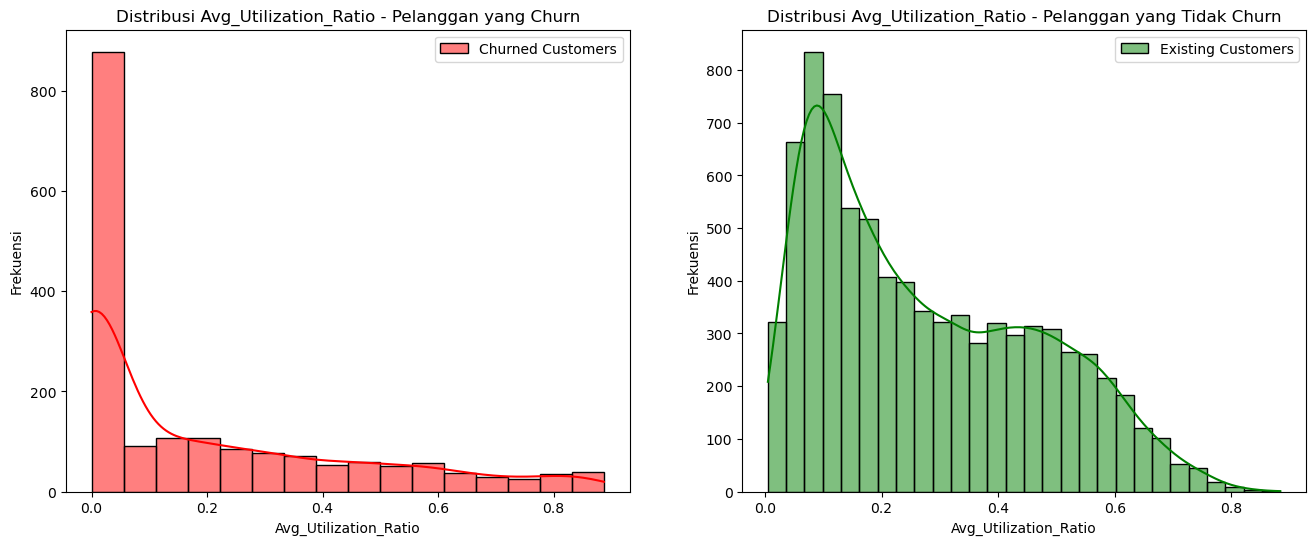

In [50]:
# Pisahkan data menjadi pelanggan yang churn dan yang tidak
churned_customers = data_credit[data_credit['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data_credit[data_credit['Attrition_Flag'] == 'Existing Customer']

# Tentukan ukuran subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot histogram distribusi Total_Revolving_Bal untuk pelanggan yang churn
sns.histplot(churned_customers['Avg_Utilization_Ratio'], kde=True, color='red', label='Churned Customers', ax=axes[0])
axes[0].set_title('Distribusi Avg_Utilization_Ratio - Pelanggan yang Churn')
axes[0].set_xlabel('Avg_Utilization_Ratio')
axes[0].set_ylabel('Frekuensi')
axes[0].legend()

# Plot histogram distribusi Total_Revolving_Bal untuk pelanggan yang tidak churn
sns.histplot(existing_customers['Avg_Utilization_Ratio'], kde=True, color='green', label='Existing Customers', ax=axes[1])
axes[1].set_title('Distribusi Avg_Utilization_Ratio - Pelanggan yang Tidak Churn')
axes[1].set_xlabel('Avg_Utilization_Ratio')
axes[1].set_ylabel('Frekuensi')
axes[1].legend()

# Tampilkan plot
plt.show()

# Insight

# Strategi yang bisa dilakukan oleh Bank

* Mengadakan event spesial untuk nasabah bank agar transaksi customer meningkat,  di Indonesia terdapat contoh seperti BCA Expo.

* Memperluas layanan seperti pembayaran di banyak platform belanja supaya meningkatkan keaktifan nasabah di layanan bank dan meningkatkan rasio penggunaan kartu kredit. 

* Memberikan program khusus untuk usia yang relatif berpotensi churn, misal di studi kasus ini di usia tua yang tidak produktif kabanyakan churn. Program khusus ini bisa seperti pengolahan dana oleh wealth spesialist, investasi yang relevan untuk usia tua dan lain-lain.

* meningkatkan komunikasi dan hubungan yang kuat dengan pelanggan yang lanjut usia atau yang berpotensi churn dengan memberikan edukasi dan promosi yang sesuai dengan perilaku pelanggan dengan layanan yang ramah dan juga profesional.

* memberikan produk atau layanan untuk nasabah bank yang lanjut usia  yang relevan seperti “Tabungan Pensiun” dengan memberikan bunga return yang tinggi dan juga kemudahan dalam mengatur dana pensiun.

# Kesimpulan

Setelah mengetahui beberapa faktor dari modelling classification tadi, Bank dapat mengimplementasikan berbagai strategi pemasaran untuk mencegah atau mengurangi churn rate dari nasabah yang berpotensi churn. Strategi-strategi tersebut meliputi mengadakan event spesial, memperluas layanan, memberikan program khusus, meningkatkan komunikasi dan hubungan, dan memberikan produk atau layanan yang relevan. Dengan strategi-strategi tersebut, bank dapat meningkatkan transaksi customer, menarik nasabah baru, memperkuat loyalitas nasabah lama, meningkatkan tingkat kepuasan dan loyalitas pelanggan, memberikan manfaat dan nilai tambah bagi nasabah, dan memberikan solusi finansial yang sesuai dengan kebutuhan dan preferensi nasabah.